In [16]:
# %pip install pystac_client==0.4
# %pip install xarray

In [17]:
# %pip install --upgrade nbformat

In [18]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm


In [19]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    # r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
catalog

c:\Users\cro005\AppData\Local\miniconda3\envs\ihe-course\lib\site-packages\pystac_client\client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


<Client id=gca-catalog>

In [20]:
list(catalog.get_collections())

c:\Users\cro005\AppData\Local\miniconda3\envs\ihe-course\lib\site-packages\pystac_client\client.py:436: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>]

In [21]:
collection=catalog.get_child("Haz-GCM_04-14")
collection

<CollectionClient id=Haz-GCM_04-14>

In [22]:
href = collection.assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:    (time: 32144, latitude: 361, longitude: 720)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T21:00:00
Data variables:
    hs         (time, latitude, longitude) float32 dask.array<chunksize=(1, 361, 720), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2004-2014 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.200401_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2004-01-01 00:00:00
    stop_date:                     2004-01-31 21:00:00
    westernmost_longitude:         0.

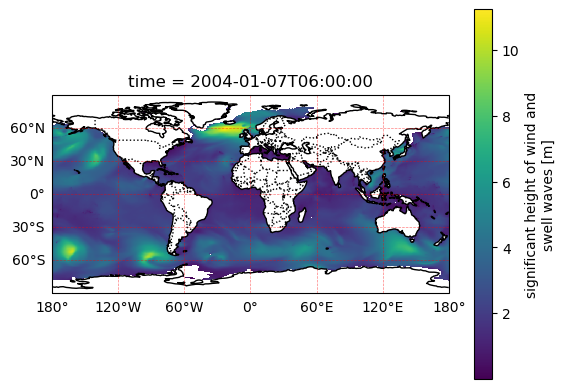

In [23]:


# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=50)["hs"].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

In [24]:
#Change longitude coordinate
def longitude_coverter(lon):
    if lon <0:
        lon=lon+360
    else:
        lon=lon
    return lon

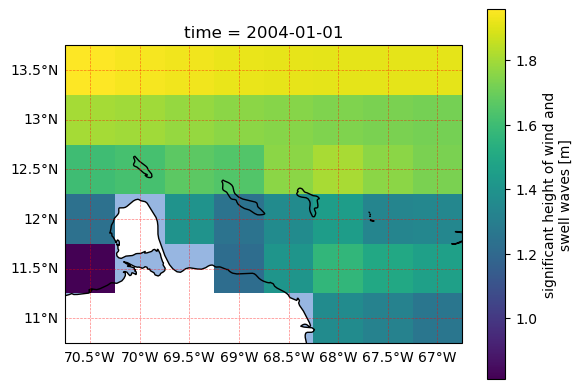

In [25]:

lon_min=-66.985558489
lon_max=-70.897144235

var="hs"
time_step=0
lat_min=10.641308809
lat_max=13.734711864


# #Change longitude coordinate
# def longitude_coverter(lon_min, lon_max)
#     lon_span=[lon_min,lon_max]

#     for i,lon in enumerate(lon_span):
#         if lon <0:
#             lon_span[i]=lon+360
#         else:
#             lon_span[i]=lon
#     return lon_span

# #Change longitude coordinate
# def longitude_coverter(lon):
#         if lon <0:
#             lon=lon+360
#         else:
#             lon=lon
#         return lon

lon_span=[longitude_coverter(lon_min),longitude_coverter(lon_max)]





# Create a map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the variable
ds.isel(time=time_step).sel(longitude=slice(np.min(lon_span),np.max(lon_span)),latitude=slice(lat_min,lat_max))[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add features like coastlines, borders, and ocean
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='red', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

create a scatterplot

In [26]:
#Import the dataframe with points of interest

df2=pd.read_csv(r"F:\Deltares laptop\Arjen_Vector_Template_Netherland_Antilles.csv")
df2.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136


In [27]:
longitude_coverter(df2["Intersect_lon"].iloc[0])

291.5989672035

In [28]:
#Filter each each ds for each df
ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[0],longitude=longitude_coverter(df2["Intersect_lon"].iloc[0]),method="nearest")
ds_filtered


<xarray.Dataset>
Dimensions:    (time: 32144)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T21:00:00
Data variables:
    hs         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2004-2014 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.200401_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2004-01-01 00:00:00
    stop_date:                     2004-01-31 21:00:00
    westernmost_longitude:         0.

In [29]:

f=ds_filtered.isel(time=0)[var].values
f


array(1.7580001, dtype=float32)

In [30]:
# Rechunk the dataset to ensure the 'time' dimension is in a single chunk
ds_filtered_unchunked = ds_filtered.chunk(dict(time=-1))
ds_filtered_unchunked 


<xarray.Dataset>
Dimensions:    (time: 32144)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T21:00:00
Data variables:
    hs         (time) float32 dask.array<chunksize=(32144,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2004-2014 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.200401_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2004-01-01 00:00:00
    stop_date:                     2004-01-31 21:00:00
    westernmost_longitude:         0.

In [31]:
q=ds_filtered_unchunked#.isel(time=slice(0,10))
q

<xarray.Dataset>
Dimensions:    (time: 32144)
Coordinates:
    latitude   float32 12.5
    longitude  float32 291.5
  * time       (time) datetime64[ns] 2004-01-01 ... 2014-12-31T21:00:00
Data variables:
    hs         (time) float32 dask.array<chunksize=(32144,), meta=np.ndarray>
Attributes: (12/36)
    AUTHOR:                        Commonwealth Scientific and Industrial Res...
    CITATION:                      CSIRO. (Year).  2004-2014 CMIP6 EC-EARTH S...
    COMMENT:                       The dataset includes significant wave heig...
    CRS:                           EPSG:4326
    Conventions:                   CF-1.8
    DESCRIPTION:                   The dataset contains projections of signif...
    ...                            ...
    northernmost_latitude:         90.
    product_name:                  ww3.200401_hs.nc
    southernmost_latitude:         -90.
    start_date:                    2004-01-01 00:00:00
    stop_date:                     2004-01-31 21:00:00
    westernmost_longitude:         0.

In [32]:


# Now apply the quantile operation to the rechunked dataset
p = q.quantile(0.95, dim='time')
p

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    quantile  float64 0.95
Data variables:
    hs        float64 dask.array<chunksize=(), meta=np.ndarray>

In [33]:
# from dask.diagnostics import ProgressBar

# with ProgressBar():
#     x=p.compute()

In [34]:
# x

In [35]:
df2["Lat_ERA5"]=0
df2["Lon_ERA5"]=0
df2["Lat_ERA5"]=df2["Lat_ERA5"].astype('float32')
df2["Lon_ERA5"]=df2["Lon_ERA5"].astype('float32')
df2

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,0.0,0.0
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,0.0,0.0
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,0.0,0.0
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,0.0,0.0
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,0.0,0.0
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,0.0,0.0
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,0.0,0.0
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,0.0,0.0


In [36]:
#Filter each each ds for all points
ds_list=[]
for i in tqdm(df2.index,desc="appending ds_list"):
    ds_filtered=ds.sel(latitude=df2["Intersect_lat"].iloc[i],longitude=longitude_coverter(df2["Intersect_lon"].iloc[i]),method="nearest")
    df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
    df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]

df2

appending ds_list:   0%|          | 0/623 [00:00<?, ?it/s]C:\Users\cro005\AppData\Local\Temp\ipykernel_9376\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lon_ERA5"].iloc[i]= ds_filtered["longitude"]
C:\Users\cro005\AppData\Local\Temp\ipykernel_9376\21376807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lat_ERA5"].iloc[i]= ds_filtered["latitude"]
appending ds_list:   0%|          | 1/623 [00:00<02:46,  3.73it/s]C:\Users\cro005\AppData\Local\Temp\ipykernel_9376\21376807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [37]:
df=df2
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5
...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5


In [38]:
df["Lat_Lon"]=list(zip(df2["Lat_ERA5"],df2["Lon_ERA5"]))
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [39]:
#Find the unique values to prevent recalculations

unique_points=df["Lat_Lon"].unique()
unique_points

array([(12.5, 291.5), (12.0, 291.0), (12.5, 291.0), (12.0, 292.0),
       (12.5, 290.0), (12.0, 291.5)], dtype=object)

In [40]:
x=12.5
y=291.5
ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
quan=ds_unchunk.quantile(0.95, dim='time')
quan

<xarray.DataArray 'hs' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    quantile  float64 0.95

In [41]:
perc_95=[]
for x,y in tqdm(unique_points,desc="calculating percentile"):
    ds_unchunk = ds[var].sel(latitude=x,longitude=y).chunk(dict(time=-1))
    quan=ds_unchunk.quantile(0.95, dim='time')
    perc_95.append(quan)
perc_95

calculating percentile: 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]


[<xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     quantile  float64 0.95]

In [42]:
from dask.diagnostics import ProgressBar
unique_hs=[]
for i,hs in tqdm(enumerate(perc_95)):
    with ProgressBar():
        unique_hs.append(hs.compute())

unique_hs

0it [00:00, ?it/s]

[########################################] | 100% Completed | 19m 59s


1it [20:02, 1202.02s/it]

[########################################] | 100% Completed | 12m 14s


2it [32:18, 928.15s/it] 

[########################################] | 100% Completed | 594.42 s


3it [42:15, 776.95s/it]

[########################################] | 100% Completed | 595.98 s


4it [52:14, 706.51s/it]

[########################################] | 100% Completed | 11m 25s


5it [1:03:41, 699.79s/it]

[########################################] | 100% Completed | 596.57 s


6it [1:13:41, 736.88s/it]


[<xarray.DataArray 'hs' ()>
 array(2.38200021)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 array(1.97200012)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 array(2.27800012)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 array(2.07200003)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 array(2.39600015)
 Coordinates:
     quantile  float64 0.95,
 <xarray.DataArray 'hs' ()>
 array(2.02600002)
 Coordinates:
     quantile  float64 0.95]

In [43]:
unique_hs_values=array_values = [da.values for da in unique_hs]
unique_hs_values

[array(2.38200021),
 array(1.97200012),
 array(2.27800012),
 array(2.07200003),
 array(2.39600015),
 array(2.02600002)]

In [44]:
unique_df = pd.DataFrame({
  'unique_points': unique_points,
  'unique_hs': unique_hs_values
})
unique_df


,unique_points,unique_hs
0,"(12.5, 291.5)",2.382000207901001
1,"(12.0, 291.0)",1.9720001220703125
2,"(12.5, 291.0)",2.2780001163482666
3,"(12.0, 292.0)",2.072000026702881
4,"(12.5, 290.0)",2.3960001468658447
5,"(12.0, 291.5)",2.0260000228881836


In [45]:

unique_df.to_csv(r'F:\Deltares laptop\unique_netherland_antilles_GCM_04_14.csv', index=False)

In [46]:
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)"
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)"
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)"
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)"
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)"
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)"
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)"
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)"


In [47]:
# Merge df_template with unique_df on the "unique_points" column
merged_df = pd.merge(df, unique_df, left_on="Lat_Lon", right_on="unique_points", how="left")
merged_df  .rename(columns={'Lat_ERA5': 'Lat_GCM_04-14', 'Lon_ERA5': 'Lon_GCM_04-14', 'unique_hs': 'Hs_EC-EARTH-WW3_04-14'}, inplace=True)

merged_df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_04-14,Lon_GCM_04-14,Lat_Lon,unique_points,Hs_EC-EARTH-WW3_04-14
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382000207901001
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382000207901001
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382000207901001
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382000207901001
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382000207901001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0260000228881836
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0260000228881836
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0260000228881836
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",2.0260000228881836


In [49]:


merged_df.to_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_04_14.csv', index=False)

In [50]:
df_master=pd.read_csv(r'F:\Deltares laptop\merged_netherland_antilles_GCM_04_14.csv')
df_master.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_GCM_04-14,Lon_GCM_04-14,Lat_Lon,unique_points,Hs_EC-EARTH-WW3_04-14
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",2.382


In [52]:


# Create the initial scatter mapbox plot
fig2 = px.scatter_mapbox(df_master,
                         lat='Lat_GCM_04-14',  
                         lon='Lon_GCM_04-14',  
                         hover_name='Lat_Lon',  
                         color='Hs_EC-EARTH-WW3_04-14',
                        #  marker=dict(size=1),
                         zoom=8,  
                         center={'lat':  12.15, 'lon': -69},  
                         width=1000,  
                         height=550,
                         title="EC-EARTH/WW3 wave heights and corresponding transects")


fig3 = px.scatter_mapbox(df_master,
                         lat='Intersect_lat',  
                         lon='Intersect_lon',  
                         hover_name='transect_id',  
                         color='Hs_EC-EARTH-WW3_04-14')

fig2.add_trace(fig3.data[0]) 

# fig2.update_traces(name='Shoreline Transects', selector=dict(type='scattermapbox'))
# Update the layout
fig2.update_layout(title="Era5 wave heights and corresponding transects",mapbox_style="carto-positron", margin=dict(l=0,r=0,b=0,t=0), showlegend=True)


# Display the plot
fig2.show()
